# DSCI 503 - Homework 07
### Nicholas Allen
Due February 27, 2022

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_table('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:,1:].values
y1 = nyc.iloc[:,0].values
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)
print(f'Training Features Shape: {X_train_1.shape}')
print(f'Test Features Shape:     {X_test_1.shape}')

Training Features Shape: (134, 5)
Test Features Shape:     (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print(f'Intercept:    {nyc_mod.intercept_}')
print(f'Coefficients: {nyc_mod.coef_}')

Intercept:    -23.755435322488907
Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)
print(f'Training r-Squared: {round(train_r2,4)}')
print(f'Testing r-Squared:  {round(test_r2,4)}')

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [6]:
test_pred_1 = nyc_mod.predict(X_test_1)
print(f'Observed Prices:  {np.round(y_test_1[:10],2)}')
print(f'Estimated Prices: {np.round(test_pred_1[:10],2)}')

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
nyc_new = [[22, 12, 20, 15, 0], [18, 19, 22, 34, 1], [25, 22, 18, 36, 0]]
new_pred_1 = nyc_mod.predict(nyc_new)
print(f'Estimated Prices: {np.round(new_pred_1,2)}')

Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_table('diamonds.txt', sep='\t')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.loc[:,'ln_carat'] = np.log(diamonds.loc[:,'carat'])
diamonds.loc[:,'ln_price'] = np.log(diamonds.loc[:,'price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


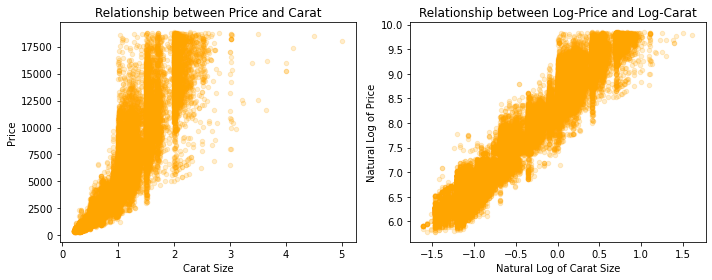

In [10]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.scatter(x=diamonds.loc[:,'carat'], y=diamonds.loc[:,'price'], s=20, alpha=0.2, 
            color='orange')
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.title('Relationship between Price and Carat')

plt.subplot(1,2,2)
plt.scatter(x=diamonds.loc[:,'ln_carat'], y=diamonds.loc[:,'ln_price'], s=20, alpha=0.2, 
            color='orange')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat')
plt.tight_layout()
plt.show()

In [11]:
X2 = diamonds.loc[:,'ln_carat'].values
X2 = X2.reshape(len(X2),1)               #input must be a 2D array
y2 = diamonds.loc[:,'ln_price'].values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)
print(f'Training Features Shape: {X_train_2.shape}')
print(f'Test Features Shape:     {X_test_2.shape}')

Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [12]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

print(f'Intercept:    {dia_mod.intercept_}')
print(f'Coefficients: {dia_mod.coef_}')

Intercept:    8.448298621179177
Coefficients: [1.67493107]


In [13]:
dia_train_r2 = dia_mod.score(X_train_2, y_train_2)
dia_test_r2 = dia_mod.score(X_test_2, y_test_2)
print(f'Training r-Squared: {round(dia_train_r2,4)}')
print(f'Testing r-Squared:  {round(dia_test_r2,4)}')

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [14]:
test_pred_2 = dia_mod.predict(X_test_2)
print(f'Observed Prices:  {np.round(np.exp(y_test_2[:10]),2)}')
print(f'Estimated Prices: {np.round(np.exp(test_pred_2[:10]),2)}')

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 728.78 6333.92 2095.66  766.14 6333.92 1611.5  5309.24 1048.31 9204.29
  804.26]


In [15]:
diamonds_new = np.log([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
diamonds_new = diamonds_new.reshape(len(diamonds_new),1)
new_pred_2 = dia_mod.predict(diamonds_new)
print(f'Estimated Prices: {np.round(np.exp(new_pred_2),0)}')

Estimated Prices: [ 1462.  4667.  9204. 14902. 21656. 29390.]


## Problem 3: Heart Disease Dataset

In [16]:
hd = pd.read_table('heart_disease.txt', sep='\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
X3 = hd.iloc[:,:-1].values
y3 = hd.iloc[:,-1].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1, stratify=y3)
print(f'Training Features Shape: {X_train_3.shape}')
print(f'Test Features Shape:     {X_test_3.shape}')

Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)


In [18]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=2000)
hd_mod.fit(X_train_3, y_train_3)

print(f'Intercept:    {hd_mod.intercept_}')
print(f'Coefficients: {hd_mod.coef_}')

Intercept:    [-9.94535888]
Coefficients: [[-0.03338096  1.82089944  0.75575428  0.02528965  0.01445641 -0.6871315
   0.32711942 -0.01942668  0.73037529  0.36433384  0.287209    1.07840577
   0.38320917]]


In [19]:
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)
print(f'Training Accuracy: {round(train_acc,4)}')
print(f'Testing Accuracy:  {round(test_acc,4)}')

Training Accuracy: 0.8472
Testing Accuracy:  0.8148


In [20]:
test_pred_3 = hd_mod.predict(X_test_3)
print(f'Observed Labels:  {y_test_3[:20]}')
print(f'Predicted Labels: {test_pred_3[:20]}')

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [21]:
Proba_df= pd.DataFrame(hd_mod.predict_proba(X_test_3[:,:]))
Proba_df.rename(columns={0: 1, 1: 2}, inplace=True)
Proba_df.index.rename('Patient', inplace=True)
Proba_df.head(10)

,1,2
Patient,,
0,0.011630,0.988370
1,0.043545,0.956455
2,0.039364,0.960636
3,0.847723,0.152277
4,0.873399,0.126601
5,0.051205,0.948795
6,0.920368,0.079632
7,0.945828,0.054172
8,0.010009,0.989991


## Problem 4: Gapminder Dataset

In [22]:
gm = pd.read_table('gapminder_data.txt', sep='\t')
gm18 = gm.loc[gm.loc[:,'year']==2018,:]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
X4 = gm18.loc[:,['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18.loc[:,'continent'].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.3, random_state=1, stratify=y4)
print(f'Training Features Shape: {X_train_4.shape}')
print(f'Test Features Shape:     {X_test_4.shape}')

Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


In [24]:
gm_mod = LogisticRegression(solver='lbfgs', penalty='none', multi_class = 'multinomial', max_iter=300)
gm_mod.fit(X_train_4, y_train_4)

print(f'Intercept:    {gm_mod.intercept_}')
print(f'Coefficients:\n\
{gm_mod.coef_}')

Intercept:    [ 0.00204978 -0.00472554  0.00331797 -0.00064221]
Coefficients:
[[-8.83323512e-02 -1.02862859e-04  2.00990330e-01]
 [-8.62506354e-02  3.30427831e-05  1.59827811e-01]
 [ 1.93809225e-02  2.94728573e-05 -2.33872145e-02]
 [ 1.55202064e-01  4.03472184e-05 -3.37430926e-01]]


In [25]:
print(f'Training Accuracy: {round(gm_mod.score(X_train_4, y_train_4),4)}')
print(f'Testing Accuracy:  {round(gm_mod.score(X_test_4, y_test_4),4)}')

Training Accuracy: 0.625
Testing Accuracy:  0.5893


In [26]:
test_pred_4 = gm_mod.predict(X_test_4)
print(f'Observed Labels:  {y_test_4[:8]}')
print(f'Predicted Labels: {test_pred_4[:8]}')

Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


In [27]:
cont_df = pd.DataFrame(gm_mod.predict_proba(X_test_4))
cont_df.rename(columns={0:'africa', 1:'americas', 2:'asia', 3:'europe'}, inplace=True)
cont_df.index.rename('CountryID', inplace=True)
cont_df.head(10)

,africa,americas,asia,europe
CountryID,,,,
0,0.066440,0.259456,0.578287,0.095817
1,0.001111,0.043604,0.358303,0.596982
2,0.662813,0.210878,0.122843,0.003467
3,0.227100,0.262036,0.456436,0.054428
4,0.002035,0.004912,0.112472,0.880582
5,0.001851,0.023846,0.252478,0.721824
6,0.630300,0.219032,0.146749,0.003919
7,0.000027,0.000735,0.033207,0.966032
8,0.001242,0.010831,0.163543,0.824384


In [28]:
gm_new = pd.DataFrame([[75, 5000, 30], [75, 5000, 40], [75, 5000, 50], [75, 20000, 30], [75, 20000, 40], [75, 20000, 50]], \
                    columns = ['life_exp', 'gdp_per_cap', 'gini'])
New_df = pd.DataFrame(np.round(gm_mod.predict_proba(gm_new),3))
New_df.rename(columns={0:'africa', 1:'americas', 2:'asia', 3:'europe'}, inplace=True)
New_df.index.rename('CountryID', inplace=True)
New_df

,africa,americas,asia,europe
CountryID,,,,
0,0.038,0.026,0.287,0.649
1,0.433,0.191,0.343,0.034
2,0.726,0.212,0.061,0.000
3,0.005,0.025,0.265,0.705
4,0.092,0.313,0.533,0.061
5,0.259,0.582,0.158,0.001


According to our model:
• Country 0 is most likely in Europe.
• Country 1 is most likely in Africa.
• Country 2 is most likely in Africa.
• Country 3 is most likely in Europe.
• Country 4 is most likely in Asia.
• Country 5 is most likely in the Americas.